In [ ]:
!pip install qiskit qiskit-aer

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer.noise import NoiseModel, pauli_error, ReadoutError

%matplotlib inline

In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x

def qpe_circuit(num_count_qubits, unitary, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    unitary: unitary gate (to apply controlled operations)
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

In [3]:
def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

In [4]:
def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    print(qc.draw(output='text'))

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     

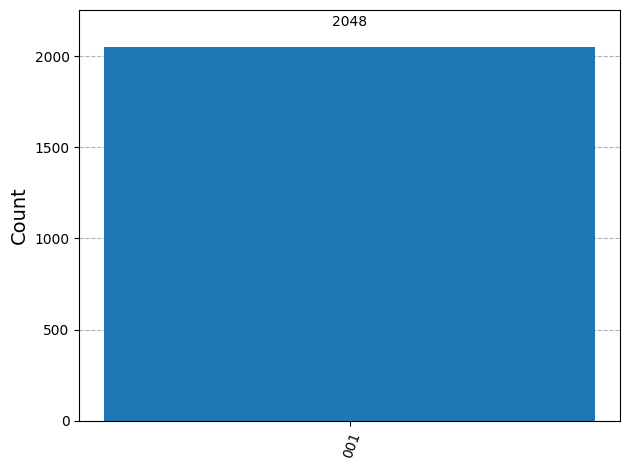

In [5]:
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

In [6]:
# Apply the inverse Quantum Fourier Transform on n qubits
def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

# Constructs the QPE circuit without measurement.
def build_qpe_circuit(num_count_qubits, theta):
    n = num_count_qubits
    qc = QuantumCircuit(n + 1, n)

    qc.h(range(n))
    qc.x(n)
    for qubit in range(n):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, n)

    inverse_qft(qc, n)

    return qc


--- Testing for theta = 0.25 ---
Theoretical Expectation: Result = 0.25 * 2^3 = 2.0
  Expected Binary (on 3 bits): '010'
Simulation Result:

--- Testing for theta = 0.375 ---
Theoretical Expectation: Result = 0.375 * 2^3 = 3.0
  Expected Binary (on 3 bits): '011'
Simulation Result:

--- Testing for theta = 0.5 ---
Theoretical Expectation: Result = 0.5 * 2^3 = 4.0
  Expected Binary (on 3 bits): '100'
Simulation Result:


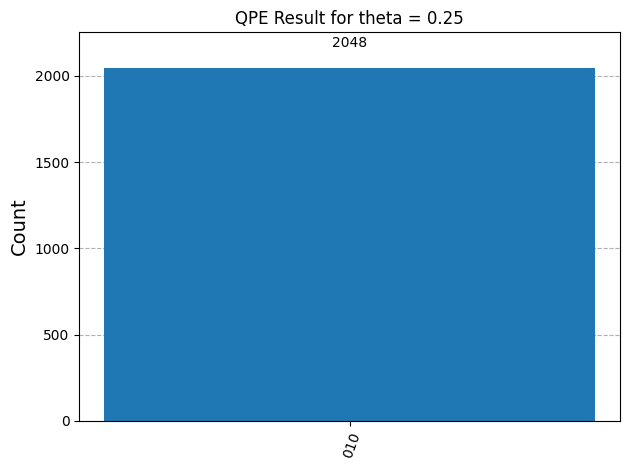

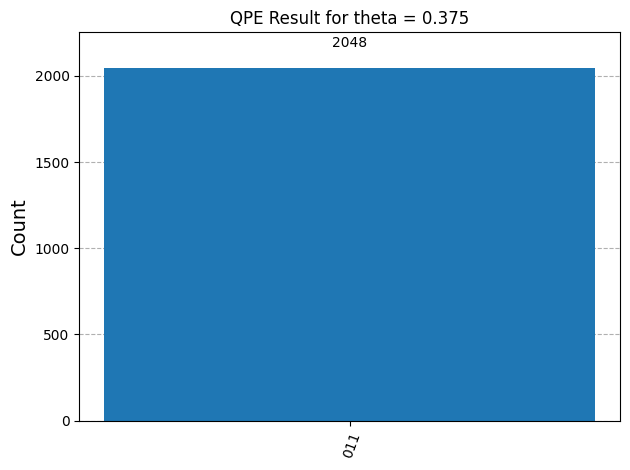

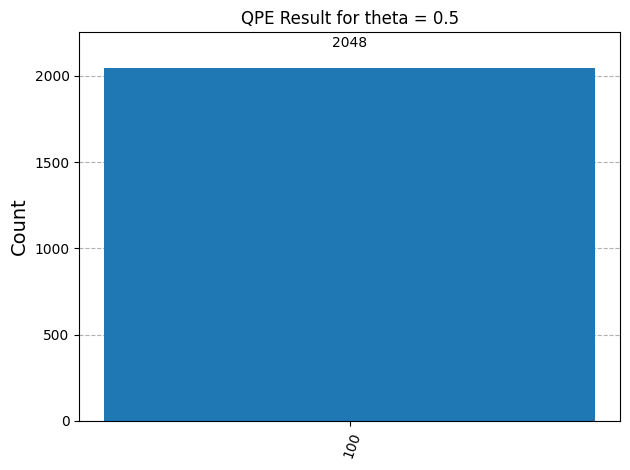

In [7]:
"""
Task 1 - Change the Phase Value 
Try different values of theta (e.g., 0.25, 0.375, 0.5) and see how the measured output changes.

Task 3 - Compare with Theoretical Output
Calculate the expected binary representation of the phase and compare with simulation results
"""

num_count_qubits = 3
n = num_count_qubits
simulator = AerSimulator()

thetas_to_test = [0.25, 0.375, 0.5]

for theta in thetas_to_test:
    print(f"\n--- Testing for theta = {theta} ---")
    
    # Theoretical Calculation
    expected_decimal = theta * (2**n)
    # Format as a binary string with 'n' digits, e.g., '010'
    expected_binary = format(int(expected_decimal), f'0{n}b')
    
    print(f"Theoretical Expectation: Result = {theta} * 2^{n} = {expected_decimal}")
    print(f"  Expected Binary (on {n} bits): '{expected_binary}'")
    
    # Simulation
    qc = build_qpe_circuit(num_count_qubits, theta)
    qc.measure(range(num_count_qubits), range(num_count_qubits))
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    
    print("Simulation Result:")
    plot_histogram(counts, title=f"QPE Result for theta = {theta}")

--- Testing with a 'hard' phase: theta = 1/3 (0.3333) ---

--- Running with n = 3 qubits ---
Expected decimal = 0.3333 * 2^3 = 2.6667
We expect the measurement to be a mix of 2 ('010') and 3 ('011').

--- Running with n = 5 qubits ---
Expected decimal = 0.3333 * 2^5 = 10.6667
We expect the measurement to be a mix of 10 ('01010') and 11 ('01011').


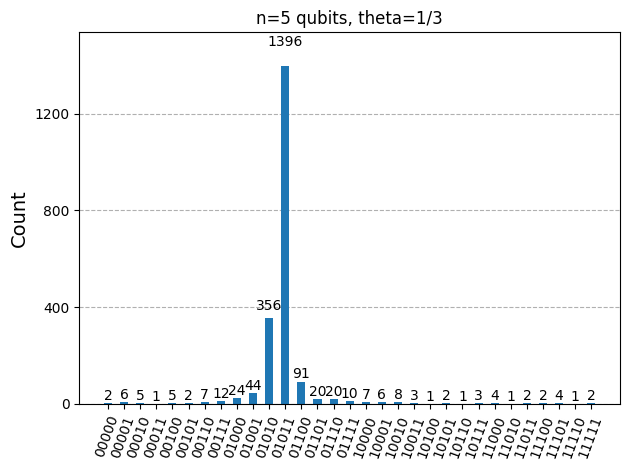

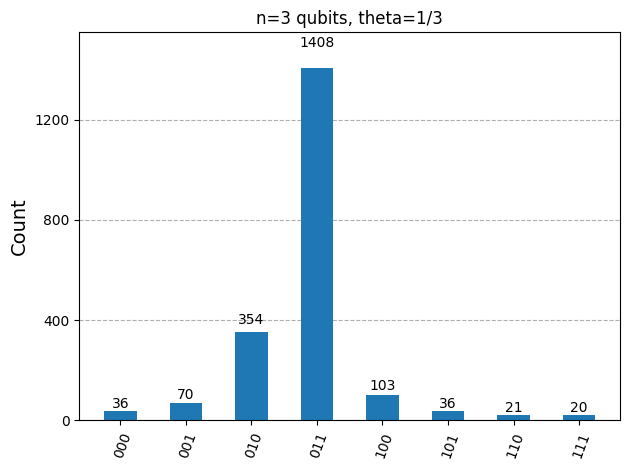

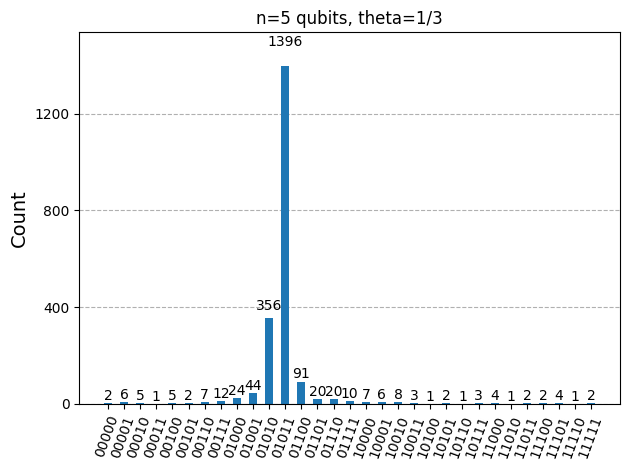

In [8]:
"""
Task 2 - Increase the Number of Counting Qubits
Use 4 or 5 counting qubits for higher precision phase estimation.
"""

theta = 1/3 
print(f"--- Testing with a 'hard' phase: theta = 1/3 ({theta:.4f}) ---")

# Low Precision (n=3)
n_low = 3
print(f"\n--- Running with n = {n_low} qubits ---")
expected_low = theta * (2**n_low)
print(f"Expected decimal = {theta:.4f} * 2^{n_low} = {expected_low:.4f}")
print("We expect the measurement to be a mix of 2 ('010') and 3 ('011').")

qc_low = build_qpe_circuit(n_low, theta)
qc_low.measure(range(n_low), range(n_low))
compiled_low = transpile(qc_low, simulator)
counts_low = simulator.run(compiled_low, shots=2048).result().get_counts()
plot_histogram(counts_low, title=f"n={n_low} qubits, theta=1/3")

# High Precision (n=5)
n_high = 5
print(f"\n--- Running with n = {n_high} qubits ---")
expected_high = theta * (2**n_high)
print(f"Expected decimal = {theta:.4f} * 2^{n_high} = {expected_high:.4f}")
print("We expect the measurement to be a mix of 10 ('01010') and 11 ('01011').")

qc_high = build_qpe_circuit(n_high, theta)
qc_high.measure(range(n_high), range(n_high))
compiled_high = transpile(qc_high, simulator)
counts_high = simulator.run(compiled_high, shots=2048).result().get_counts()
plot_histogram(counts_high, title=f"n={n_high} qubits, theta=1/3")

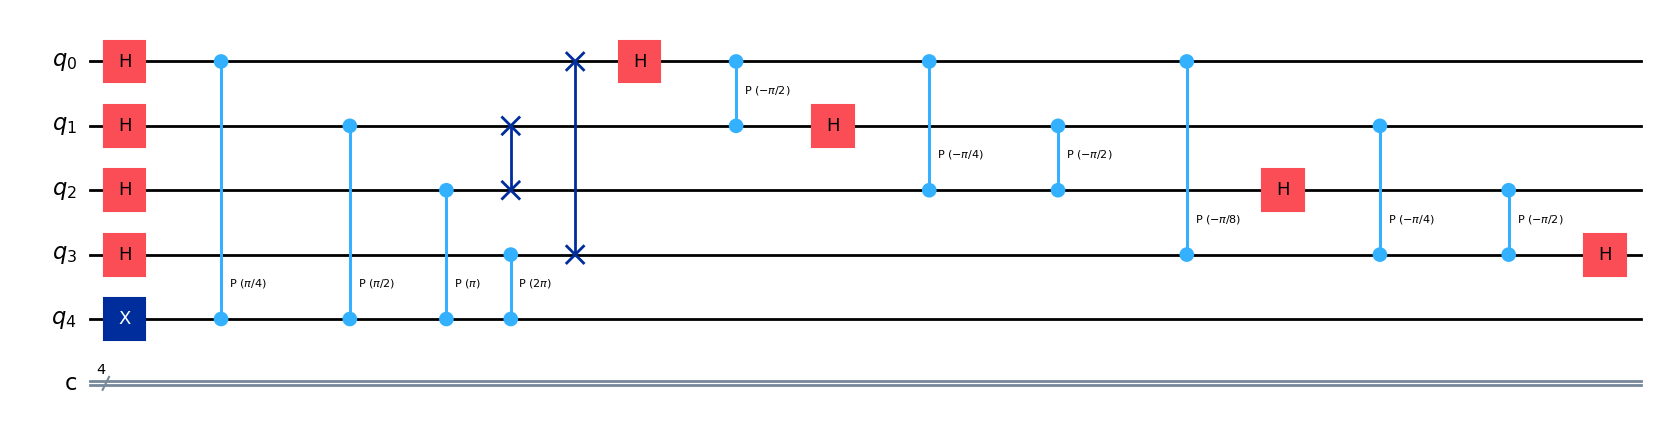

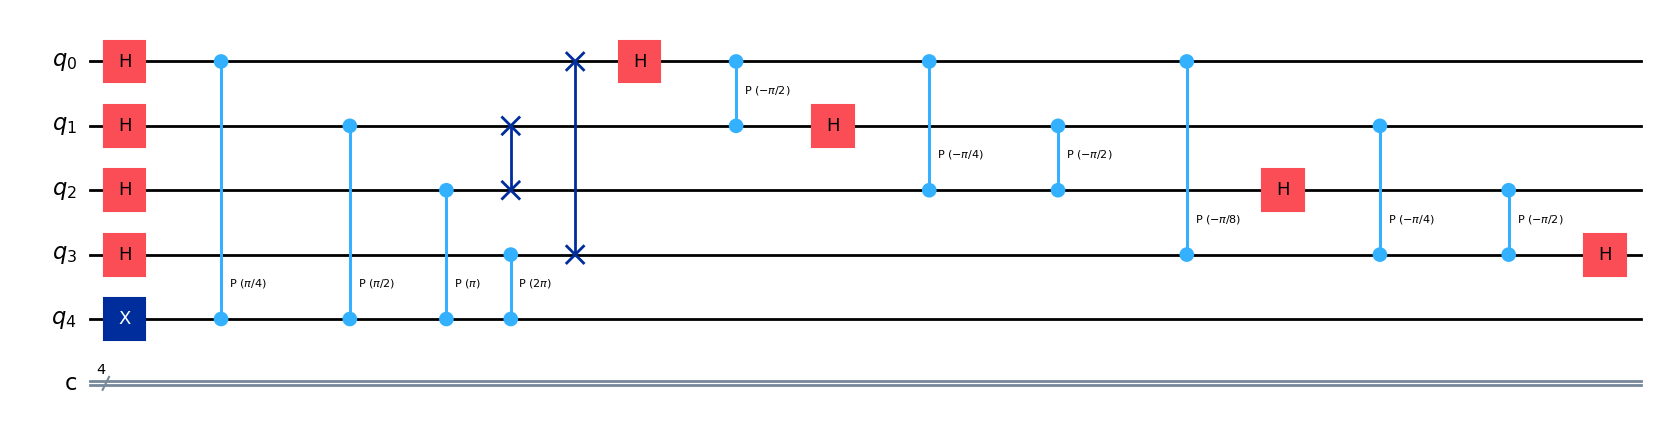

In [9]:
"""
Task 4 - Inverse QFT Visualization
Add a qc.draw('mpl') command before measurement to visualize the inverse QFT structure.
"""

n_vis = 4
theta_vis = 0.125

qc_vis = build_qpe_circuit(n_vis, theta_vis)
qc_vis.draw('mpl')

Adding 1.0% gate error ('h' gate) to qubits [0, 1, 2]...
Adding 2.0% readout error to qubits [0, 1, 2]...
Noise model created successfully.
--- Comparing Ideal vs. Noisy Simulation (Expect '010') ---


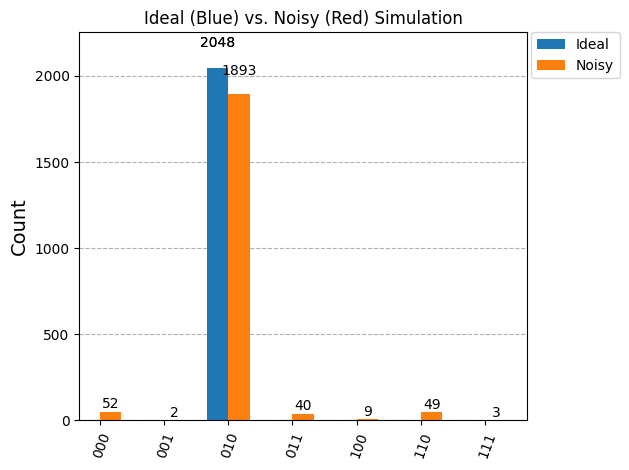

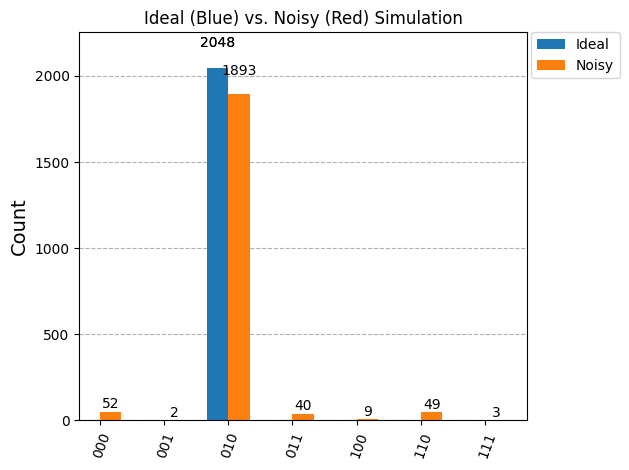

In [10]:
"""
Task 5 - Noise Simulation
Introduce a NoiseModel using Qiskit Aer and observe how it affects accuracy.
"""

noise_model = NoiseModel()
qubits_with_error = [0, 1, 2]

p_gate_error = 0.01
gate_error = pauli_error([('X', p_gate_error), ('I', 1 - p_gate_error)])
print(f"Adding {p_gate_error*100}% gate error ('h' gate) to qubits {qubits_with_error}...")
for qubit in qubits_with_error:
    noise_model.add_quantum_error(gate_error, "h", [qubit])

p_readout_error = 0.02
readout_error = ReadoutError([[1 - p_readout_error, p_readout_error], 
                            [p_readout_error, 1 - p_readout_error]])
print(f"Adding {p_readout_error*100}% readout error to qubits {qubits_with_error}...")
for qubit in qubits_with_error:
    noise_model.add_readout_error(readout_error, [qubit])

print("Noise model created successfully.")

ideal_simulator = AerSimulator()
noisy_simulator = AerSimulator(noise_model=noise_model)

n_noise = 3
theta_noise = 0.25  # expected value '010'

qc_noise = build_qpe_circuit(n_noise, theta_noise)
qc_noise.measure(range(n_noise), range(n_noise))

# ideal (no noise)
compiled_ideal = transpile(qc_noise, ideal_simulator)
counts_ideal = ideal_simulator.run(compiled_ideal, shots=2048).result().get_counts()

# noisy
compiled_noisy = transpile(qc_noise, noisy_simulator)
counts_noisy = noisy_simulator.run(compiled_noisy, shots=2048).result().get_counts()

print("--- Comparing Ideal vs. Noisy Simulation (Expect '010') ---")
plot_histogram([counts_ideal, counts_noisy], 
                       title="Ideal (Blue) vs. Noisy (Red) Simulation",
                       legend=['Ideal', 'Noisy'])